In [1]:
#Import Libraries
import cPickle as pickle
import os
import numpy as np
from IPython import display
import matplotlib.pyplot as plt
import theano
import matplotlib.cm as cm
import lasagne
from lasagne import layers
from lasagne.updates import nesterov_momentum
from nolearn.lasagne import NeuralNet
from nolearn.lasagne import visualize
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

Using gpu device 0: GeForce 820M (CNMeM is disabled, cuDNN not available)
C:\Users\admin\Anaconda2\lib\site-packages\theano\tensor\signal\downsample.py:6: UserWarning: downsample module has been moved to the theano.tensor.signal.pool module.
  "downsample module has been moved to the theano.tensor.signal.pool module.")


In [2]:
class PlotLosses(object):
    def __init__(self, figsize=(8, 6)):
        plt.plot([],[])
    def __call__(self, nn, train_history):
        train_loss=np.array([i["train_loss"] for i in nn.train_history_])
        valid_loss=np.array([i["valid_loss"] for i in nn.train_history_])
        
        plt.gca().cla()
        plt.plot(train_loss, label="train")
        plt.plot(valid_loss, label="test")
        
        plt.legend()
        plt.draw()

In [3]:
#Loading Data..
def load_data(path):
    x_train = np.zeros((50000, 3, 32, 32), dtype='uint8')
    y_train = np.zeros((50000,), dtype="uint8")

    for i in range(1, 6):
        data = unpickle(os.path.join(path, 'data_batch_' + str(i)))
        images = data['data'].reshape(10000, 3, 32, 32)
        labels = data['labels']
        x_train[(i - 1) * 10000:i * 10000, :, :, :] = images
        y_train[(i - 1) * 10000:i * 10000] = labels

    test_data = unpickle(os.path.join(path, 'test_batch'))
    x_test = test_data['data'].reshape(10000, 3, 32, 32)
    y_test = np.array(test_data['labels'])

    return x_train/np.float32(255), y_train/np.float32(255), x_test/np.float32(255), y_test/np.float32(256)

#Define unpickle Function
def unpickle(file):
    f = open(file, 'rb')
    dict = pickle.load(f)
    f.close()
    return dict

x_train, y_train, x_test, y_test = load_data(os.path.expanduser('F:/pandas-ex/mnist-test/cifar-10-batches-py'))

In [4]:
net = NeuralNet(
    layers=[('input', layers.InputLayer),
            ('conv2d1', layers.Conv2DLayer),
            ('maxpool1', layers.MaxPool2DLayer),
            ('conv2d2', layers.Conv2DLayer),
            ('maxpool2', layers.MaxPool2DLayer),
            ('dense', layers.DenseLayer),
            ('output', layers.DenseLayer),
            ],
    input_shape=(None, 3, 32, 32),
    conv2d1_num_filters=20,
    conv2d1_filter_size=(5, 5),
    conv2d1_stride=(1, 1),
    conv2d1_pad=(2, 2),
    conv2d1_nonlinearity=lasagne.nonlinearities.rectify,
    
    maxpool1_pool_size=(2, 2),
    
    conv2d2_num_filters=20,
    conv2d2_filter_size=(5, 5),
    conv2d2_stride=(1, 1),
    conv2d2_pad=(2, 2),
    
    conv2d2_nonlinearity=lasagne.nonlinearities.rectify,
    
    maxpool2_pool_size=(2, 2),
    
    dense_num_units=1000,
    dense_nonlinearity=lasagne.nonlinearities.rectify,
    output_nonlinearity=lasagne.nonlinearities.softmax,
    output_num_units=10,
    update=nesterov_momentum,
    update_momentum=0.9,
    update_learning_rate=0.0001,
    max_epochs=100,
    verbose=True,
    on_epoch_finished=[PlotLosses(figsize=(8, 6))]
)

In [5]:
net.fit(x_train, y_train)
with open('net1.pickle', 'wb') as f:
    pickle.dump(net,f, -1)

f:\pandas-ex\mnist-test\lasagne\lasagne\layers\conv.py:489: UserWarning: The `image_shape` keyword argument to `tensor.nnet.conv2d` is deprecated, it has been renamed to `input_shape`.
  border_mode=border_mode)
f:\pandas-ex\nolearn-test\nolearn\lasagne\base.py:428: UserWarning: The Param class is deprecated. Replace Param(default=N) by theano.In(value=N)
  for input_layer in input_layers]
f:\pandas-ex\nolearn-test\nolearn\lasagne\base.py:429: UserWarning: The Param class is deprecated. Replace Param(default=N) by theano.In(value=N)
  inputs = X_inputs + [theano.Param(y_batch, name="y")]
WARNING (theano.gof.compilelock): Overriding existing lock by dead process '1012' (I am process '9108')


# Neural Network with 1302550 learnable parameters

## Layer information

  #  name      size
---  --------  --------
  0  input     3x32x32
  1  conv2d1   20x32x32
  2  maxpool1  20x16x16
  3  conv2d2   20x16x16
  4  maxpool2  20x8x8
  5  dense     1000
  6  output    10



TypeError: ('Bad input argument to theano function with name "f:\\pandas-ex\\nolearn-test\\nolearn\\lasagne\\base.py:435" at index 1 (0-based)', 'TensorType(int32, vector) cannot store a value of dtype float32 without risking loss of precision. If you do not mind this loss, you can: 1) explicitly cast your data to int32, or 2) set "allow_input_downcast=True" when calling "function".', array([ 0.0078125 ,  0.0078125 ,  0.0078125 ,  0.03125   ,  0.03125   ,
        0.03125   ,  0.03125   ,  0.0078125 ,  0.0078125 ,  0.03125   ,
        0.03125   ,  0.03125   ,  0.0078125 ,  0.0078125 ,  0.0078125 ,
        0.03125   ,  0.03125   ,  0.0078125 ,  0.0078125 ,  0.0234375 ,
        0.0234375 ,  0.0234375 ,  0.03125   ,  0.0234375 ,  0.0078125 ,
        0.03125   ,  0.0234375 ,  0.0078125 ,  0.0078125 ,  0.0078125 ,
        0.0234375 ,  0.0234375 ,  0.03125   ,  0.0234375 ,  0.03125   ,
        0.0078125 ,  0.0234375 ,  0.0234375 ,  0.0234375 ,  0.0234375 ,
        0.03125   ,  0.0234375 ,  0.0234375 ,  0.0234375 ,  0.0078125 ,
        0.03125   ,  0.0234375 ,  0.0234375 ,  0.03125   ,  0.0078125 ,
        0.0234375 ,  0.03125   ,  0.03125   ,  0.0078125 ,  0.0078125 ,
        0.0234375 ,  0.0078125 ,  0.01171875,  0.01171875,  0.01171875,
        0.01171875,  0.03125   ,  0.01171875,  0.0078125 ,  0.0078125 ,
        0.0078125 ,  0.03125   ,  0.0234375 ,  0.0234375 ,  0.01171875,
        0.01171875,  0.0234375 ,  0.01171875,  0.0078125 ,  0.03125   ,
        0.0078125 ,  0.0234375 ,  0.01171875,  0.01171875,  0.        ,
        0.03125   ,  0.0078125 ,  0.0234375 ,  0.0078125 ,  0.03125   ,
        0.        ,  0.01171875,  0.0234375 ,  0.01171875,  0.03125   ,
        0.01171875,  0.0234375 ,  0.03125   ,  0.01171875,  0.0234375 ,
        0.0234375 ,  0.0078125 ,  0.0234375 ,  0.02734375,  0.01171875,
        0.        ,  0.        ,  0.        ,  0.0078125 ,  0.0078125 ,
        0.0078125 ,  0.0078125 ,  0.0234375 ,  0.01171875,  0.0234375 ,
        0.0234375 ,  0.03125   ,  0.03125   ,  0.01171875,  0.0234375 ,
        0.        ,  0.0234375 ,  0.        ,  0.01171875,  0.0234375 ,
        0.0234375 ,  0.015625  ,  0.03125   ,  0.01171875,  0.0078125 ,
        0.0234375 ,  0.        ,  0.01171875], dtype=float32))

In [15]:
%matplotlib inline

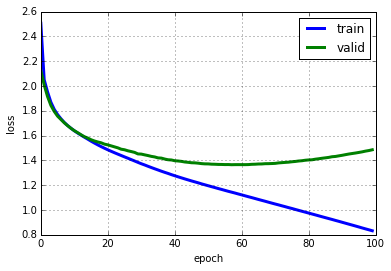

In [17]:
train_loss=np.array([i["train_loss"] for i in net.train_history_])
valid_loss=np.array([i["valid_loss"] for i in net.train_history_]) 
plt.plot(train_loss, linewidth=3, label="train")
plt.plot(valid_loss, linewidth=3, label="valid")
plt.grid()
plt.legend()
plt.xlabel("epoch")
plt.ylabel("loss")
plt.show()

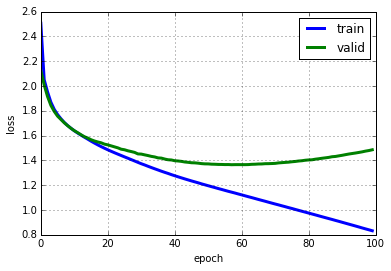

In [3]:
train_loss=np.array([i["train_loss"] for i in net.train_history_])
valid_loss=np.array([i["valid_loss"] for i in net.train_history_]) 
plt.plot(train_loss, linewidth=3, label="train")
plt.plot(valid_loss, linewidth=3, label="valid")
plt.grid()
plt.legend()
plt.xlabel("epoch")
plt.ylabel("loss")
plt.ylim(1e1, 1e-2)
plt.yscale("log")
plt.show()

NameError: name 'net' is not defined

In [2]:
predictions=net.predict(x_test)
print classification_report(y_test, predictions)
print accuracy_score(y_test, predictions)

NameError: name 'net' is not defined